# Reconstruct multiple fields

This tutorial demonstrates how to reconstruct multiple fields, e.g. both the temperature and sea level pressure fields.

## Test data preparation

To go through this tutorial, please prepare test data following the steps:
1. Download the test case named "PAGES2k_CCSM4_GISTEMP" with this [link](https://drive.google.com/drive/folders/1UGn-LNd_tGSjPUKa52E6ffEM-ms2VD-N?usp=sharing).
2. Create a directory named "testcases" in the same directory where this notebook sits.
3. Put the unzipped direcotry "PAGES2k_CCSM4_GISTEMP" into "testcases".

Below, we first load some useful packages, including our `LMRt`.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import os
import numpy as np
import pandas as pd
import xarray as xr

## Load and modify configurations

We will first load the given example YAML file, which is set to reconstruct the temperature field only.
We then modify specific items to set it to reconstruct both the temperature and sea level pressure fields.

In [2]:
job = LMRt.ReconJob()
job.load_configs(cfg_path='./testcases/PAGES2k_CCSM4_GISTEMP/configs.yml', verbose=True)

LMRt: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PAGES2k_CCSM4_GISTEMP/configs.yml
LMRt: job.load_configs() >>> job.configs created
LMRt: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon
LMRt: job.load_configs() >>> /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon created
{'anom_period': [1951, 1980],
 'job_dirpath': '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/gistemp1200_ERSSTv4.nc'},
 'obs_varname': {'tas': 'tempanomaly'},
 'prior_path': {'tas': './data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc'},
 'prior_regrid_ntrunc': 42,
 'prior_season': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'prior_varname': {'tas': 'TREFHT'},
 'proxy_frac': 0.75,
 'proxydb_path': './data/proxy/pages2k_dataset.pkl',
 'psm_calib_period': [1850, 2

We need to modify the `prior_path` and the `prior_varname` in the configurations, as well as `recon_vars` that indicates which variables to reconstruct.
We also modify the `job_dirpath` to save the results to a different location.

In [3]:
job.configs['job_dirpath'] = './testcases/PAGES2k_CCSM4_GISTEMP/recon_tas_psl'

job.configs['recon_vars'] = ['tas', 'psl']

job.configs['prior_path'] = {
    'tas': './data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc',
    'psl': './data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.PSL.085001-184912.nc',
}

# prior_varname indicates the variable names in the given netCDF files
job.configs['prior_varname'] = {
    'tas': 'TREFHT',
    'psl': 'PSL',
}

## Run the reconstruction using the high-level workflow

In [4]:
job.prepare(verbose=True)

LMRt: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/proxy/pages2k_dataset.pkl
LMRt: job.load_proxydb() >>> 692 records loaded
LMRt: job.load_proxydb() >>> job.proxydb created
LMRt: job.filter_proxydb() >>> filtering proxy records according to: ['coral.d18O', 'coral.SrCa', 'coral.calc']
LMRt: job.filter_proxydb() >>> 95 records remaining
LMRt: job.seasonalize_proxydb() >>> seasonalizing proxy records according to: {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
LMRt: job.seasonalize_proxydb() >>> 95 records remaining
LMRt: job.seasonalize_proxydb() >>> job.proxydb updated
LMRt: job.load_prior() >>> loading model prior fields from: {'tas': '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc', 'psl': 

Searching nearest location:   7%|▋         | 7/95 [00:00<00:01, 63.40it/s]

LMRt: job.seasonalize_ds_for_psm() >>> job.seasonalized_prior created


Searching nearest location: 100%|██████████| 95/95 [00:01<00:00, 65.57it/s]
/Users/fzhu/Github/LMRt/LMRt/utils.py:243: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(var[inds, ...], axis=0)


LMRt: job.proxydb.find_nearest_loc() >>> job.proxydb.prior_lat_idx & job.proxydb.prior_lon_idx created
LMRt: job.proxydb.get_var_from_ds() >>> job.proxydb.records[pid].prior_time & job.proxydb.records[pid].prior_value created
LMRt: job.seasonalize_ds_for_psm() >>> job.configs["ptype_season"] = {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
LMRt: job.seasonalize_ds_for_psm() >>> Seasonalizing variables from obs with season: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Searching nearest location:   6%|▋         | 6/95 [00:00<00:01, 55.17it/s]

LMRt: job.seasonalize_ds_for_psm() >>> job.seasonalized_obs created


Calibrating PSM:   5%|▌         | 5/95 [00:00<00:01, 49.42it/s]

LMRt: job.proxydb.find_nearest_loc() >>> job.proxydb.obs_lat_idx & job.proxydb.obs_lon_idx created
LMRt: job.proxydb.get_var_from_ds() >>> job.proxydb.records[pid].obs_time & job.proxydb.records[pid].obs_value created
LMRt: job.proxydb.init_psm() >>> job.proxydb.records[pid].psm initialized
LMRt: job.calibrate_psm() >>> PSM calibration period: [1850, 2015]


Calibrating PSM:  62%|██████▏   | 59/95 [00:01<00:00, 51.29it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Forwarding PSM: 100%|██████████| 95/95 [00:00<00:00, 848.83it/s]

LMRt: job.proxydb.calib_psm() >>> job.proxydb.records[pid].psm calibrated
LMRt: job.proxydb.calib_psm() >>> job.proxydb.calibed created
LMRt: job.proxydb.forward_psm() >>> job.proxydb.records[pid].psm forwarded


LMRt: job.seasonalize_prior() >>> seasonalized prior w/ season [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc
    Shape:  time:1001, lat:96, lon:144

     Name:  psl
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.PSL.085001-184912.nc
    Shape:  time:1001, lat:96, lon:144
LMRt: job.seasonalize_ds_for_psm() >>> job.prior updated
LMRt: job.regrid_prior() >>> regridded prior
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/prior/b.e11.BLMTRC5CN.f19_g16.001.cam.h0.TREFHT.085001-184912.nc
    Shape:  time:1001, lat:42, lon:63

     Name:  psl
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_

In [5]:
%%time
job.run(recon_seeds=np.arange(1), verbose=True)

KF updating:   0%|          | 0/2001 [00:00<?, ?it/s]

LMRt: job.run() >>> job.configs["recon_seeds"] = [0]
LMRt: job.run() >>> job.configs["save_settings"] = {'compress_dict': {'zlib': True, 'least_significant_digit': 1}, 'output_geo_mean': False, 'target_lats': [], 'target_lons': [], 'output_full_ens': False, 'dtype': 32}
LMRt: job.run() >>> job.configs saved to: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_tas_psl/job_configs.yml
LMRt: job.run() >>> seed: 0 | max: 0
LMRt: job.run() >>> randomized indices for prior and proxies saved to: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_tas_psl/job_r00_idx.pkl
Proxy Database Overview
-----------------------
     Source:        /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/PAGES2k_CCSM4_GISTEMP/data/proxy/pages2k_dataset.pkl
       Size:        70
Proxy types:        {'coral.calc': 6, 'coral.SrCa': 19, 'coral.d18O': 45}


KF updating: 100%|██████████| 2001/2001 [03:09<00:00, 10.58it/s] 


LMRt: job.save_recon() >>> Reconstructed fields saved to: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_tas_psl/job_r00_recon.nc
LMRt: job.run() >>> DONE!


Once done, we will get the struture below in the "recon_top" directory:
```
.
├── calibed_psm.pkl
├── job_configs.yml
├── job_r00_idx.pkl
├── job_r00_recon.nc
├── job.pkl
├── obs_loc.pkl
├── prior_loc.pkl
├── seasonalized_obs.pkl
└── seasonalized_prior.pkl
```

We now do a quick preview of the results below.
For more details of the visualization of the results, please move on to the tutorial regarding visualizations.

## A quick preview of the results

In [6]:
# create the res object for reconstruction results
res = LMRt.ReconRes(job.configs['job_dirpath'], verbose=True)

recon_paths: ['./testcases/PAGES2k_CCSM4_GISTEMP/recon_tas_psl/job_r00_recon.nc']
idx_paths: ['./testcases/PAGES2k_CCSM4_GISTEMP/recon_tas_psl/job_r00_idx.pkl']
job_path: ./testcases/PAGES2k_CCSM4_GISTEMP/recon_tas_psl/job.pkl


In [16]:
# get the varialbes from the recon_paths
# note: field_varnames is to indicate that 'tas' and 'psl' are field variables instead of series variables
res.get_vars(['tas', 'psl'], field_varnames=['tas', 'psl'], verbose=True)

LMRt: res.get_var() >>> loading variable: tas
LMRt: res.get_var() >>> loading variable: psl
LMRt: res.get_var() >>> res.vars filled w/ varnames: ['tas', 'psl'] and ['year', 'lat', 'lon']


In [17]:
# we can print the information of each variable
print(res.vars['tas'])
print(res.vars['psl'])

varname: tas
nt: 2001
nlat: 42
nlon: 63
nEns: 1
varname: psl
nt: 2001
nlat: 42
nlon: 63
nEns: 1


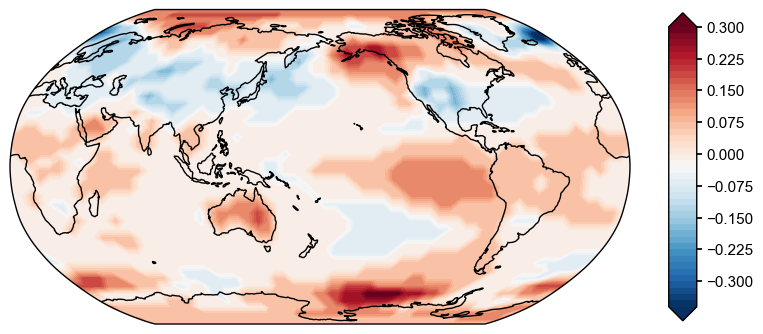

In [18]:
# plot the tas field
fig, ax = res.vars['tas'].field_list[0].plot(idx_t=-1)

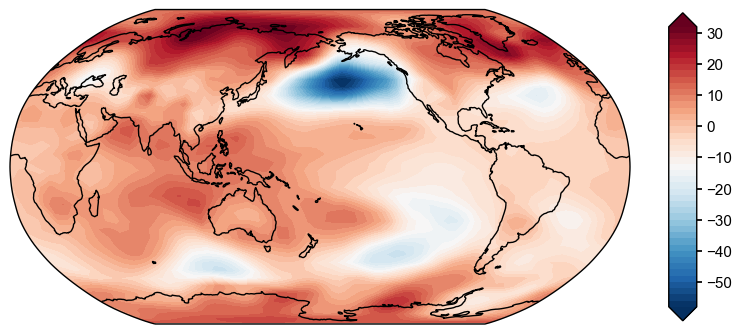

In [19]:
# plot the psl field
fig, ax = res.vars['psl'].field_list[0].plot(idx_t=-1)